# Accuracy check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## Load Predictions

In [2]:
results = pd.read_csv('results/tree_pred_prob.csv')
results.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,8627,Are Whites Being Setup for Genocide?,1,unreliable,0.107523,0.892465
1,7528,Consortiumnews.com,0,reliable,0.999944,0.000055
2,2377,United Methodists Vote Down Israel Divestment ...,0,reliable,0.999377,0.000620
3,4139,Book Notice: Phoenix from the Ashes by H. J. A...,1,reliable,0.890773,0.109201
4,10169,Are Green Smoothies Bad for You?,0,reliable,0.897047,0.102929
5,4793,Supreme Court Hears Church Firing Case,0,reliable,0.999868,0.000131
6,6786,number National Prayer by Anne Graham Lotz,0,reliable,0.812116,0.187852
7,1688,Self-Powered Smart Toys with Nanogenerators Wi...,1,unreliable,0.000070,0.999929
8,5968,Best Food to Prevent Common Childhood Infections,0,reliable,0.923522,0.076453
9,6510,Experiments Prove numberth Spatial Dimension,1,unreliable,0.000813,0.999184


In [3]:
targets = ['reliable', 'unreliable']
targets_dict = dict(zip(targets, range(len(targets))))
targets_dict

{'reliable': 0, 'unreliable': 1}

In [4]:
results['predict'] = list(map(lambda x: targets_dict[x], results['preds']))
results.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,8627,Are Whites Being Setup for Genocide?,1,unreliable,0.107523,0.892465,1
1,7528,Consortiumnews.com,0,reliable,0.999944,0.000055,0
2,2377,United Methodists Vote Down Israel Divestment ...,0,reliable,0.999377,0.000620,0
3,4139,Book Notice: Phoenix from the Ashes by H. J. A...,1,reliable,0.890773,0.109201,0
4,10169,Are Green Smoothies Bad for You?,0,reliable,0.897047,0.102929,0
5,4793,Supreme Court Hears Church Firing Case,0,reliable,0.999868,0.000131,0
6,6786,number National Prayer by Anne Graham Lotz,0,reliable,0.812116,0.187852,0
7,1688,Self-Powered Smart Toys with Nanogenerators Wi...,1,unreliable,0.000070,0.999929,1
8,5968,Best Food to Prevent Common Childhood Infections,0,reliable,0.923522,0.076453,0
9,6510,Experiments Prove numberth Spatial Dimension,1,unreliable,0.000813,0.999184,1


## Performance Check

In [5]:
y_true = results.target
y_pred = results.predict

In [6]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93      1160
          1       0.93      0.91      0.92      1073

avg / total       0.92      0.92      0.92      2233



## Plot Confusion Matrix

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[1082   78]
 [  96  977]]


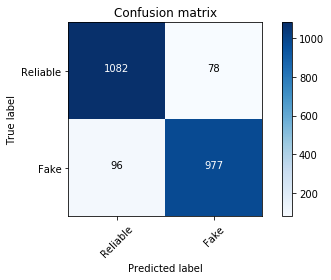

In [8]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred),['Reliable', 'Fake'])